## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
mouse_metadata= pd.read_csv("data/Mouse_metadata.csv")
study_results = pd.read_csv("data/Study_results.csv")
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:

# Combine the data into a single datase
combine_mouse_data= pd.merge(mouse_metadata, study_results, how= 'outer', on="Mouse ID")


# Display the data table for preview
combine_mouse_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [4]:
# Checking the number of mice.
len(pd.unique(combine_mouse_data["Mouse ID"]))

249

In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_timepoint = combine_mouse_data.groupby("Mouse ID")


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_dedupe = combine_mouse_data.drop_duplicates(subset = ['Mouse ID','Timepoint'])
mouse_dedupe

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
len(pd.unique(combine_mouse_data["Mouse ID"]))

249

## Summary Statistics

In [8]:
tumor_vol = mouse_dedupe[["Drug Regimen", "Tumor Volume (mm3)"]]
drugs= tumor_vol["Drug Regimen"].unique()

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

tumor_vol = mouse_dedupe[["Drug Regimen", "Tumor Volume (mm3)"]]
# mean, median

tumor_vol_mean = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].mean()
tumor_vol_median = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].median()
# variance, standard deviaition:
tumor_vol_variance = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].var()
tumor_vol_std = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].std()

# SEM 
tumor_vol_sem = tumor_vol.groupby("Drug Regimen")['Tumor Volume (mm3)'].sem()
tumor_vol_sem

tumor_vol_data = {'Mean Tumor Volume' : tumor_vol_mean, 'Median Tumor Volume': tumor_vol_median, "Variance": tumor_vol_variance, "Standard Deviation": tumor_vol_std, "Standard Error of the Mean": tumor_vol_sem }



In [10]:
# Assemble the resulting series into a single summary dataframe.
tumor_vol_df = pd.DataFrame(tumor_vol_data)
tumor_vol_df

,Mean Tumor Volume,Median Tumor Volume,Variance,Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_counts = mouse_dedupe['Drug Regimen'].value_counts()
drug_counts



Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     156
Name: Drug Regimen, dtype: int64

Text(0, 0.5, 'Number of Measurments taken')

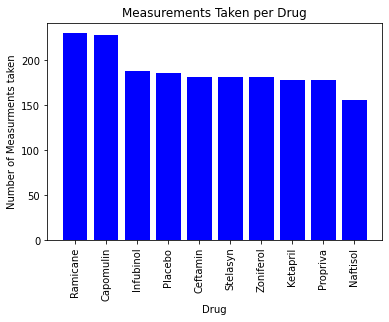

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

drug_counts = drug_counts
x_axis = drugs
plt.bar(x_axis, drug_counts, color = 'b', align= "center")
plt.xticks(rotation='vertical')
plt.title ("Measurements Taken per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurments taken")


(-0.5, 9.5)

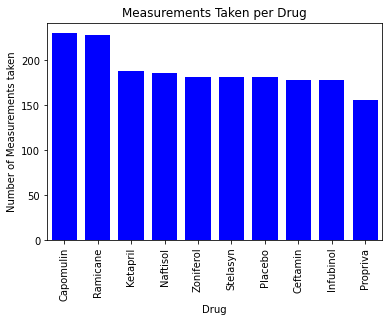

In [13]:
# create same table using pandas
drug_panda_table=drug_counts.plot(kind="bar", facecolor="b", title="Measurements Taken per Drug", width=.75)
drug_panda_table.set_ylabel("Number of Measurements taken") 
drug_panda_table.set_xlabel("Drug")
drug_panda_table.set_xlim(-0.5, 9.5)

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_dedupe.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


([<matplotlib.patches.Wedge at 0x16eae9f9a00>,
 [Text(-0.025622895044835736, 1.0997015355311284, 'Male'),
  Text(0.025622792083347525, -1.099701537930112, 'Female')],
 [Text(-0.013976124569910401, 0.5998372011987972, '50.7%'),
  Text(0.01397606840909865, -0.5998372025073339, '49.3%')])

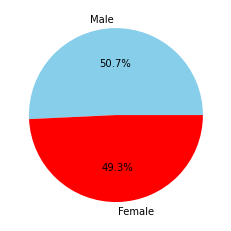

In [15]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male", "Female"]
sizes = [958, 930]
colors = ["skyblue", "red"]
sex_values = mouse_dedupe["Sex"].value_counts()
sex_values

plt.pie(sex_values, labels=labels, colors=colors, autopct="%1.1f%%")


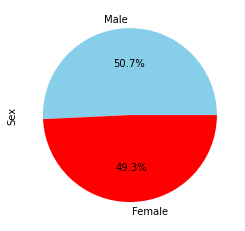

In [16]:
# generate same chart using pandas
plot = sex_values.plot.pie(subplots=True, colors=colors, autopct="%1.1f%%")

## Quartiles, Outliers and Boxplots

In [17]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

timepoint = mouse_dedupe.sort_values(by="Timepoint", ascending=False)
timepoint =timepoint[timepoint["Drug Regimen"]!='Ketapril']   
timepoint =timepoint[timepoint["Drug Regimen"]!='Propriva'] 
timepoint =timepoint[timepoint["Drug Regimen"]!='Naftisol']
timepoint =timepoint[timepoint["Drug Regimen"]!='Zoniferol'] 
timepoint =timepoint[timepoint["Drug Regimen"]!='Stelasyn']
timepoint =timepoint[timepoint["Drug Regimen"]!='Placebo'] 
timepoint

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
134,r554,Capomulin,Female,8,17,45,32.377357,3
144,m957,Capomulin,Female,3,19,45,33.329098,1
800,e476,Infubinol,Male,23,26,45,62.435404,1
154,c758,Ramicane,Male,9,17,45,33.397653,1
...,...,...,...,...,...,...,...,...
484,a275,Ceftamin,Female,20,28,0,45.000000,0
825,f345,Infubinol,Male,23,26,0,45.000000,0
75,z578,Ramicane,Male,11,16,0,45.000000,0
1661,w151,Ceftamin,Male,24,25,0,45.000000,0


In [18]:

# Start by getting the last (greatest) timepoint for each mouse

timepoint = timepoint.sort_values(by="Timepoint", ascending=False)
timepoint

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
834,f345,Infubinol,Male,23,26,45,60.918767,1
299,b742,Capomulin,Male,7,21,45,38.939633,0
272,d251,Ramicane,Female,8,19,45,37.311236,2
244,g288,Capomulin,Male,3,19,45,37.074024,1
430,a444,Ramicane,Female,10,25,45,43.047543,0
...,...,...,...,...,...,...,...,...
1069,k804,Infubinol,Female,23,29,0,45.000000,0
263,d251,Ramicane,Female,8,19,0,45.000000,0
245,i334,Ramicane,Female,8,20,0,45.000000,0
273,l897,Capomulin,Male,17,19,0,45.000000,0


In [19]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [20]:
# calculate quartiles and IQR for all four treatment regmins to highlight any
# potential outliers in the plot by changing their color and styles
# Capomulin, Ramicane, Infubinol, and Ceftamin

capomulin =timepoint[timepoint["Drug Regimen"]=='Capomulin']  
capomulin_volume = capomulin["Tumor Volume (mm3)"]
capomulin_quartiles = capomulin_volume.quantile([.25,.5,.75])
capomulin_lowerq = capomulin_quartiles[0.25]
capomulin_upperq = capomulin_quartiles[0.75]
capomulin_iqr = capomulin_upperq-capomulin_lowerq

print(f"The upper quartile of Capomulin treatment is: {capomulin_upperq}")
print(f"The lower quartile of Capomulin treatment is: {capomulin_lowerq}")
print(f"The interquartile range of Capomulin treatment is: {capomulin_iqr}")
print(f"The median treatment is: {capomulin_quartiles[0.5]}")

The upper quartile of Capomulin treatment is: 45.0
The lower quartile of Capomulin treatment is: 37.685932865
The interquartile range of Capomulin treatment is: 7.314067135000002
The median treatment is: 41.557808879999996


In [21]:
ramicane =timepoint[timepoint["Drug Regimen"]=='Ramicane']  
ramicane_volume = ramicane["Tumor Volume (mm3)"]
ramicane_quartiles = ramicane_volume.quantile([.25,.5,.75])
ramicane_lowerq = ramicane_quartiles[0.25]
ramicane_upperq = ramicane_quartiles[0.75]
ramicane_iqr = ramicane_upperq-ramicane_lowerq

print(f"The upper quartile of ramicane treatment is: {ramicane_upperq}")
print(f"The lower quartile of ramicane treatment is: {ramicane_lowerq}")
print(f"The interquartile range of ramicane treatment is: {ramicane_iqr}")
print(f"The median treatment is: {ramicane_quartiles[0.5]}")

The upper quartile of ramicane treatment is: 45.0
The lower quartile of ramicane treatment is: 36.67463458499999
The interquartile range of ramicane treatment is: 8.325365415000007
The median treatment is: 40.67323554


In [22]:
infubinol =timepoint[timepoint["Drug Regimen"]=='Infubinol']  
infubinol_volume = infubinol["Tumor Volume (mm3)"]
infubinol_quartiles = infubinol_volume.quantile([.25,.5,.75])
infubinol_lowerq = infubinol_quartiles[0.25]
infubinol_upperq = infubinol_quartiles[0.75]
infubinol_iqr = infubinol_upperq-infubinol_lowerq

print(f"The upper quartile of infubinol treatment is: {infubinol_upperq}")
print(f"The lower quartile of infubinol treatment is: {infubinol_lowerq}")
print(f"The interquartile range of infubinol treatment is: {infubinol_iqr}")
print(f"The median treatment is: {infubinol_quartiles[0.5]}")

The upper quartile of infubinol treatment is: 57.314443967500004
The lower quartile of infubinol treatment is: 47.3123533
The interquartile range of infubinol treatment is: 10.002090667500006
The median treatment is: 51.82058438


In [23]:
ceftamin =timepoint[timepoint["Drug Regimen"]=='Ceftamin']  
ceftamin_volume = ceftamin["Tumor Volume (mm3)"]
ceftamin_quartiles = ceftamin_volume.quantile([.25,.5,.75])
ceftamin_lowerq = ceftamin_quartiles[0.25]
ceftamin_upperq = ceftamin_quartiles[0.75]
ceftamin_iqr = ceftamin_upperq-ceftamin_lowerq

print(f"The upper quartile of ceftamin treatment is: {ceftamin_upperq}")
print(f"The lower quartile of ceftamin treatment is: {ceftamin_lowerq}")
print(f"The interquartile range of ceftamin treatment is: {ceftamin_iqr}")
print(f"The median treatment is: {ceftamin_quartiles[0.5]}")

The upper quartile of ceftamin treatment is: 56.801437570000004
The lower quartile of ceftamin treatment is: 47.208427112500004
The interquartile range of ceftamin treatment is: 9.5930104575
The median treatment is: 51.77615728000001


In [24]:
# calculate any potential outliers for each drug

capomulin_lower_bound = capomulin_lowerq - (1.5*capomulin_iqr)
capomulin_upper_bound = capomulin_upperq + (1.5*capomulin_iqr)

print(f"Capomulin outliers could be below {capomulin_lower_bound} or above {capomulin_upper_bound}.")

ramicane_lower_bound = ramicane_lowerq - (1.5*ramicane_iqr)
ramicane_upper_bound = ramicane_upperq + (1.5*ramicane_iqr)

print(f"Ramicane outliers could be below {ramicane_lower_bound} or above {ramicane_upper_bound}.")

infubinol_lower_bound = infubinol_lowerq - (1.5*infubinol_iqr)
infubinol_upper_bound = infubinol_upperq + (1.5*infubinol_iqr)

print(f"Infubinol outliers could be below {infubinol_lower_bound} or above {infubinol_upper_bound}.")

ceftamin_lower_bound = ceftamin_lowerq - (1.5*ceftamin_iqr)
ceftamin_upper_bound = ceftamin_upperq + (1.5*ceftamin_iqr)

print(f"Ceftamin outliers could be below {ceftamin_lower_bound} or above {ceftamin_upper_bound}.")


Capomulin outliers could be below 26.714832162499995 or above 55.9711007025.
Ramicane outliers could be below 24.18658646249998 or above 57.48804812250001.
Infubinol outliers could be below 32.309217298749985 or above 72.31757996875001.
Ceftamin outliers could be below 32.818911426250004 or above 71.19095325625.


[Text(1, 0, 'Capomulin'),
 Text(2, 0, 'Ramicane'),
 Text(3, 0, 'Infubinol'),
 Text(4, 0, 'Ceftamin')]

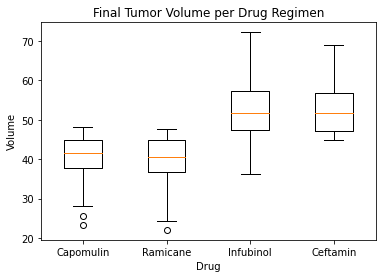

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
volumes = (capomulin_volume, ramicane_volume, infubinol_volume, ceftamin_volume)

                    
fig1, ax1 = plt.subplots()
ax1.boxplot(volumes)

plt.title("Final Tumor Volume per Drug Regimen")
plt.ylabel("Volume")
plt.xlabel("Drug")
plt.setp(ax1, xticklabels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

## Line and Scatter Plots

In [26]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

capomulin_mouse = timepoint[timepoint["Drug Regimen"]=='Capomulin']   
capomulin_mouse




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
299,b742,Capomulin,Male,7,21,45,38.939633,0
244,g288,Capomulin,Male,3,19,45,37.074024,1
440,i557,Capomulin,Female,1,24,45,47.685963,1
204,i738,Capomulin,Female,23,20,45,37.311846,2
39,m601,Capomulin,Male,22,17,45,28.430964,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
20,x401,Capomulin,Female,16,15,0,45.000000,0
361,s710,Capomulin,Female,1,23,0,45.000000,0
310,j246,Capomulin,Female,21,21,0,45.000000,0


Text(0, 0.5, 'Tumor Volume (mm)')

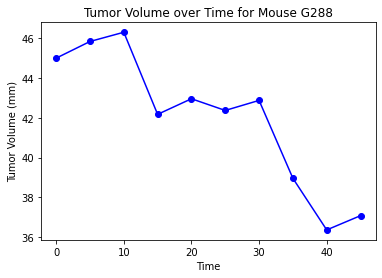

In [40]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_g288 = timepoint[timepoint["Mouse ID"]=='g288'] 
g288_x = mouse_g288["Timepoint"]
g288_y = mouse_g288["Tumor Volume (mm3)"]

plt.plot(g288_x, g288_y, color="blue", marker='o')
plt.title("Tumor Volume over Time for Mouse G288")
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm)")

Text(0, 0.5, 'Mouse Weight (g)')

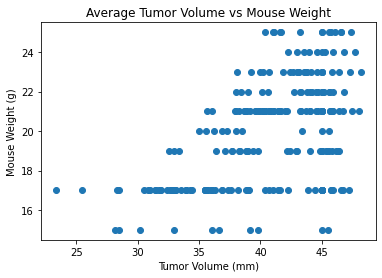

In [49]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

x_axis = capomulin_mouse["Tumor Volume (mm3)"]
y_axis = capomulin_mouse["Weight (g)"]



plt.scatter(x_axis, y_axis)
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Tumor Volume (mm)")
plt.ylabel("Mouse Weight (g)")

## Correlation and Regression

In [35]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
tvolume_average = capomulin_mouse["Tumor Volume (mm3)"]
# .sum()/ len(capomulin_mouse["Tumor Volume (mm3)"])

weight = capomulin_mouse["Weight (g)"]
# .sum()/ len(capomulin_mouse["Weight (g)"])

correlation= st.pearsonr(weight, tvolume_average)
print(f"The correlation between both factors is {correlation[0]}")

The correlation between both factors is 0.525699555207717


In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(weight, tvolume_average)
regress_values = weight * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{correlation}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.9609669432428373
intercept:21.48982721329953
rvalue (Correlation coefficient):0.5256995552077175
pandas (Correlation coefficient):(0.525699555207717, 9.605446629502006e-18)
stderr:0.10298279892023661
y = 0.96x + 21.49


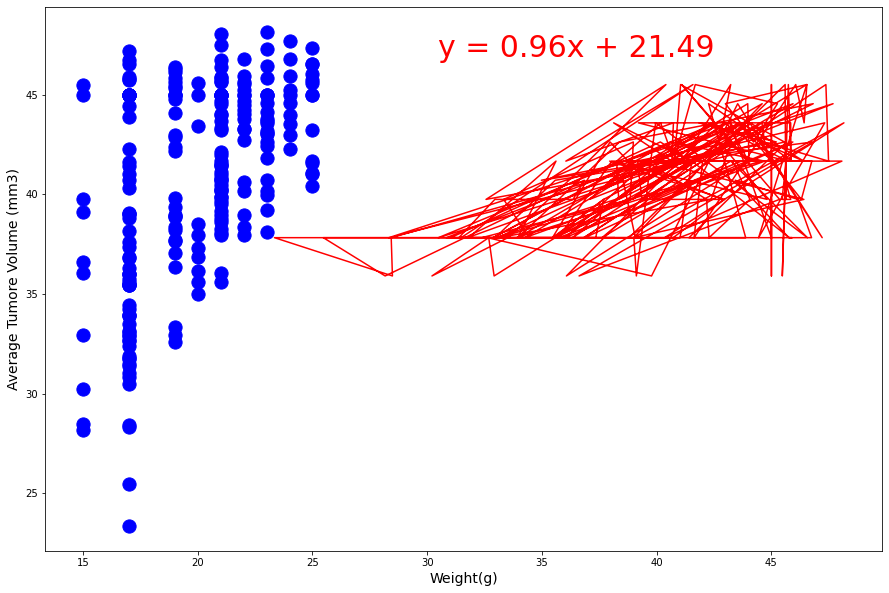

In [37]:
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(weight, tvolume_average, s=175, color="blue")
plt.plot(tvolume_average, regress_values,"r-")
plt.xlabel('Weight(g)',fontsize =14)
plt.ylabel('Average Tumore Volume (mm3)',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")

plt.show()

# not sure where things went wrong. 